# IITM - MLP - Week 12

## Imports

In [5]:
# ---------- Common ------------
import os, time, json, random, ast
from datetime import datetime ; from collections import Counter; from pprint import pprint; from statistics import mode

# ---------- Data Manipulation ------------
import pandas as pd; import numpy as np

# ---------- Data Visualization ------------
from pandas.plotting import scatter_matrix
from pandas.core import missing
import matplotlib as mpl; from matplotlib import pyplot as plt; from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import plotly.express as px

# ---------- Sklearn ------------
from sklearn import set_config

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, cross_validate, cross_val_predict, validation_curve, learning_curve, ShuffleSplit, GridSearchCV, RandomizedSearchCV, KFold, RepeatedKFold, permutation_test_score
from sklearn.preprocessing import add_dummy_feature, OrdinalEncoder, OneHotEncoder, LabelBinarizer, LabelEncoder, MultiLabelBinarizer, MinMaxScaler, MaxAbsScaler, StandardScaler, FunctionTransformer, PolynomialFeatures, KBinsDiscretizer
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV, SGDRegressor, Ridge, RidgeCV, Lasso, LassoCV, Perceptron, SGDClassifier, RidgeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, explained_variance_score, max_error, mean_absolute_error, r2_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, plot_roc_curve, precision_recall_curve, accuracy_score, precision_score, recall_score, f1_score, accuracy_score, classification_report, hinge_loss, make_scorer, log_loss
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, SelectKBest, GenericUnivariateSelect, mutual_info_classif, mutual_info_regression, chi2, f_classif, f_regression, RFE, RFECV, SequentialFeatureSelector, SelectFromModel
from sklearn.datasets import load_iris, fetch_california_housing, make_blobs, make_regression, make_classification, make_multilabel_classification, fetch_openml

from sklearn.tree import export_text, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.feature_extraction import DictVectorizer
from sklearn.neural_network import MLPClassifier, MLPRegressor


# ---------- Imblearn ------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# ---------- Scipy ------------
from scipy import stats
from scipy.stats import pearsonr, spearmanr, kendalltau, loguniform, uniform

# ---------- Extras ------------
import pickle
# pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))

import tempfile

import warnings
warnings.filterwarnings("ignore")  # supress all warning (use with care)

## Presets

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

# set_config(display='diagram')

np.random.seed(306)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)
# mpl.rc("figure", figsize=(8,6))

# Load MNIST data

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

# Normalizing
X_train = X_train/255
X_test = X_test/255

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


# Load California Housing Dataset

In [6]:
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)
labels *= 100

In [7]:
com_train_features, test_features, com_train_labels, test_labels = train_test_split(features, labels, random_state=42)
train_features, dev_features, train_labels, dev_labels = train_test_split(com_train_features, com_train_labels, random_state=42)

# Multilayer Perceptron Classifier : MNIST

## Fit MLPCLassifier with 1 hidden layer with 128 neurons.

In [4]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)

cv_score = cross_val_score(mlpc, X_train, y_train, cv=cv)
print(cv_score.mean() * 100)

mlpc.predict_proba(X_test[:5]) # probabilities for first 5 samples, on each of the 10 digits.

97.66666666666669


array([[3.63878377e-11, 5.65035142e-15, 1.39354691e-09, 2.31826648e-07,
        3.29105479e-20, 1.90210796e-14, 4.54402987e-22, 9.99999764e-01,
        1.39866079e-12, 2.86684663e-09],
       [9.42753736e-17, 1.23345119e-11, 1.00000000e+00, 2.71759117e-13,
        1.38317215e-31, 4.76230471e-17, 7.72986093e-16, 2.29824143e-27,
        1.53872216e-11, 1.33975724e-24],
       [9.01831319e-11, 9.99954690e-01, 8.01696775e-06, 8.59140571e-10,
        2.16798059e-09, 1.02709366e-09, 8.79842963e-10, 1.02487910e-06,
        3.62628646e-05, 1.22200320e-10],
       [9.99999995e-01, 1.42515943e-18, 5.25084616e-09, 8.50671452e-16,
        1.06154114e-16, 3.86157090e-14, 1.81282357e-12, 5.80525896e-15,
        5.50665561e-21, 1.35582547e-11],
       [2.43889124e-13, 1.27955905e-18, 1.37715983e-13, 4.77024429e-18,
        9.99993024e-01, 1.74520670e-18, 2.13192172e-12, 4.98681948e-11,
        1.00192839e-12, 6.97596095e-06]])

In [8]:
print(f"Train acc: {accuracy_score(y_train, mlpc.predict(X_train))}")
print(f"Test acc: {accuracy_score(y_test, mlpc.predict(X_test))}")

print(classification_report(y_test, mlpc.predict(X_test)))

Train acc: 1.0
Test acc: 0.9777
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



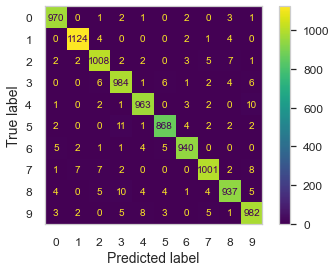

In [11]:
ConfusionMatrixDisplay.from_predictions(y_test, mlpc.predict(X_test))
plt.grid(False)
plt.show()

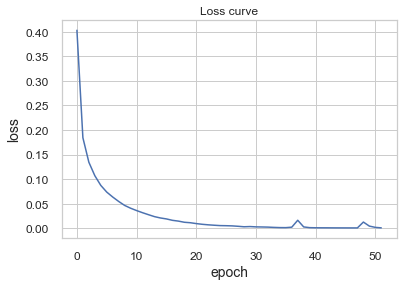

In [9]:
plt.plot(mlpc.loss_curve_, 'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curve')
plt.show()

# Multilayer Perceptron Regressor : California Housing

In [12]:
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('regressor', MLPRegressor(hidden_layer_sizes=(32)))
])

cv_results = cross_validate(pipe, 
                            com_train_features, 
                            com_train_labels, 
                            cv=cv, 
                            scoring='neg_mean_absolute_percentage_error', 
                            return_train_score=True, 
                            return_estimator=True)

mlp_train_error = -1 * cv_results['train_score']
mlp_test_error = -1 * cv_results['test_score']

print(f'training score: {mlp_train_error.mean():.3f} +/- {mlp_train_error.std():0.3f}')
print(f'testing score: {mlp_test_error.mean():.3f} +/- {mlp_test_error.std():0.3f}')

training score: 0.258 +/- 0.002
testing score: 0.257 +/- 0.004


In [13]:
pipe.fit(com_train_features, com_train_labels)

print(mean_absolute_percentage_error(com_train_labels, pipe.predict(com_train_features)))
print(mean_absolute_percentage_error(test_labels, pipe.predict(test_features)))

0.2535970431550168
0.2619726011364738


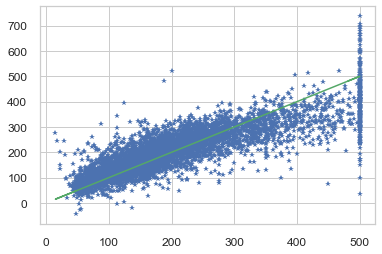

In [14]:
plt.plot(test_labels, pipe.predict(test_features), 'b*')
plt.plot(test_labels, test_labels, 'g-')
plt.show()

# END